 # Random Forest
 The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
 
 Random forest algorithm can be used for both classifications and regression task. It provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In [8]:
train_scores = []
test_scores = []
rf = RandomForestClassifier(warm_start = True, random_state=0)
estimator_range = range(1,100,5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

warm_start may be used when building random forests to add more trees to the forest (increasing n_estimators)

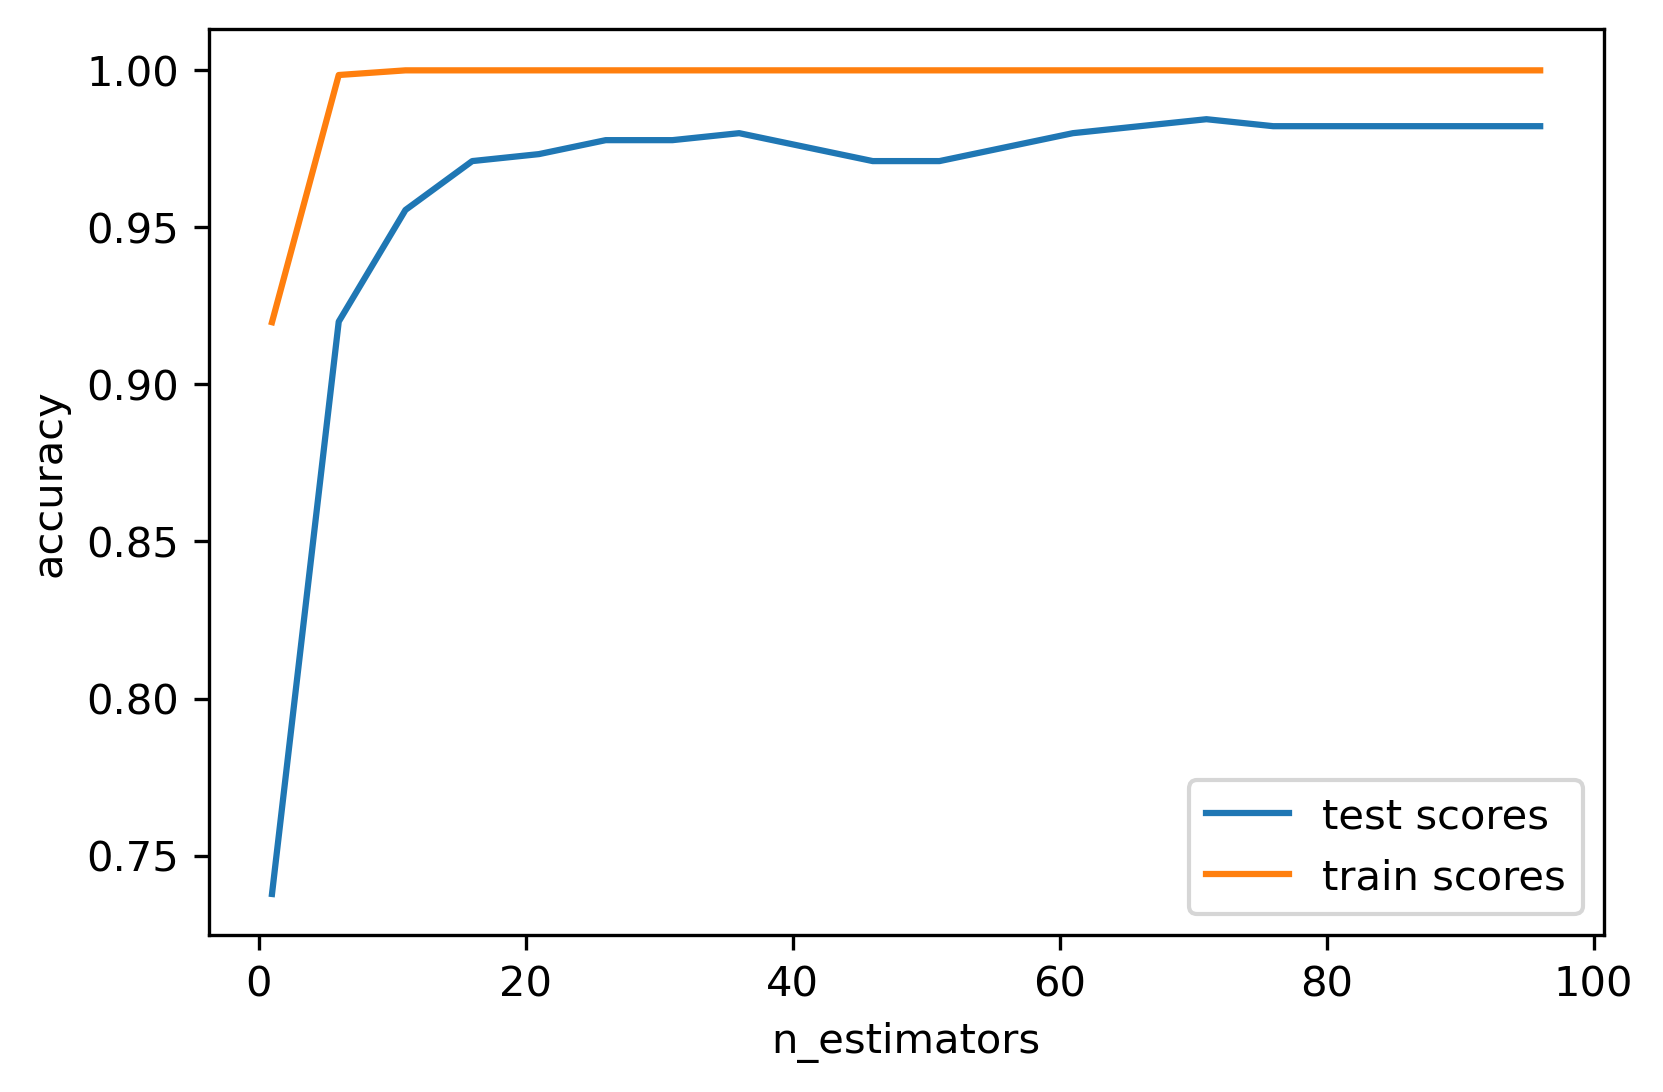

In [9]:
plt.plot(estimator_range, test_scores, label = 'test scores')
plt.plot(estimator_range, train_scores, label='train scores')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

# Out of bag estimate
* Each tree only uses ~66% of data on average i.e each tree use 2/3 of the data
* we Can evaluate it on the rest
* Make predictions for out-of-bag, average, score
* Each Prediction is an average over different subset of trees

In [10]:
train_scores =[]
test_scores = []
oob_scores = []

feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score = True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

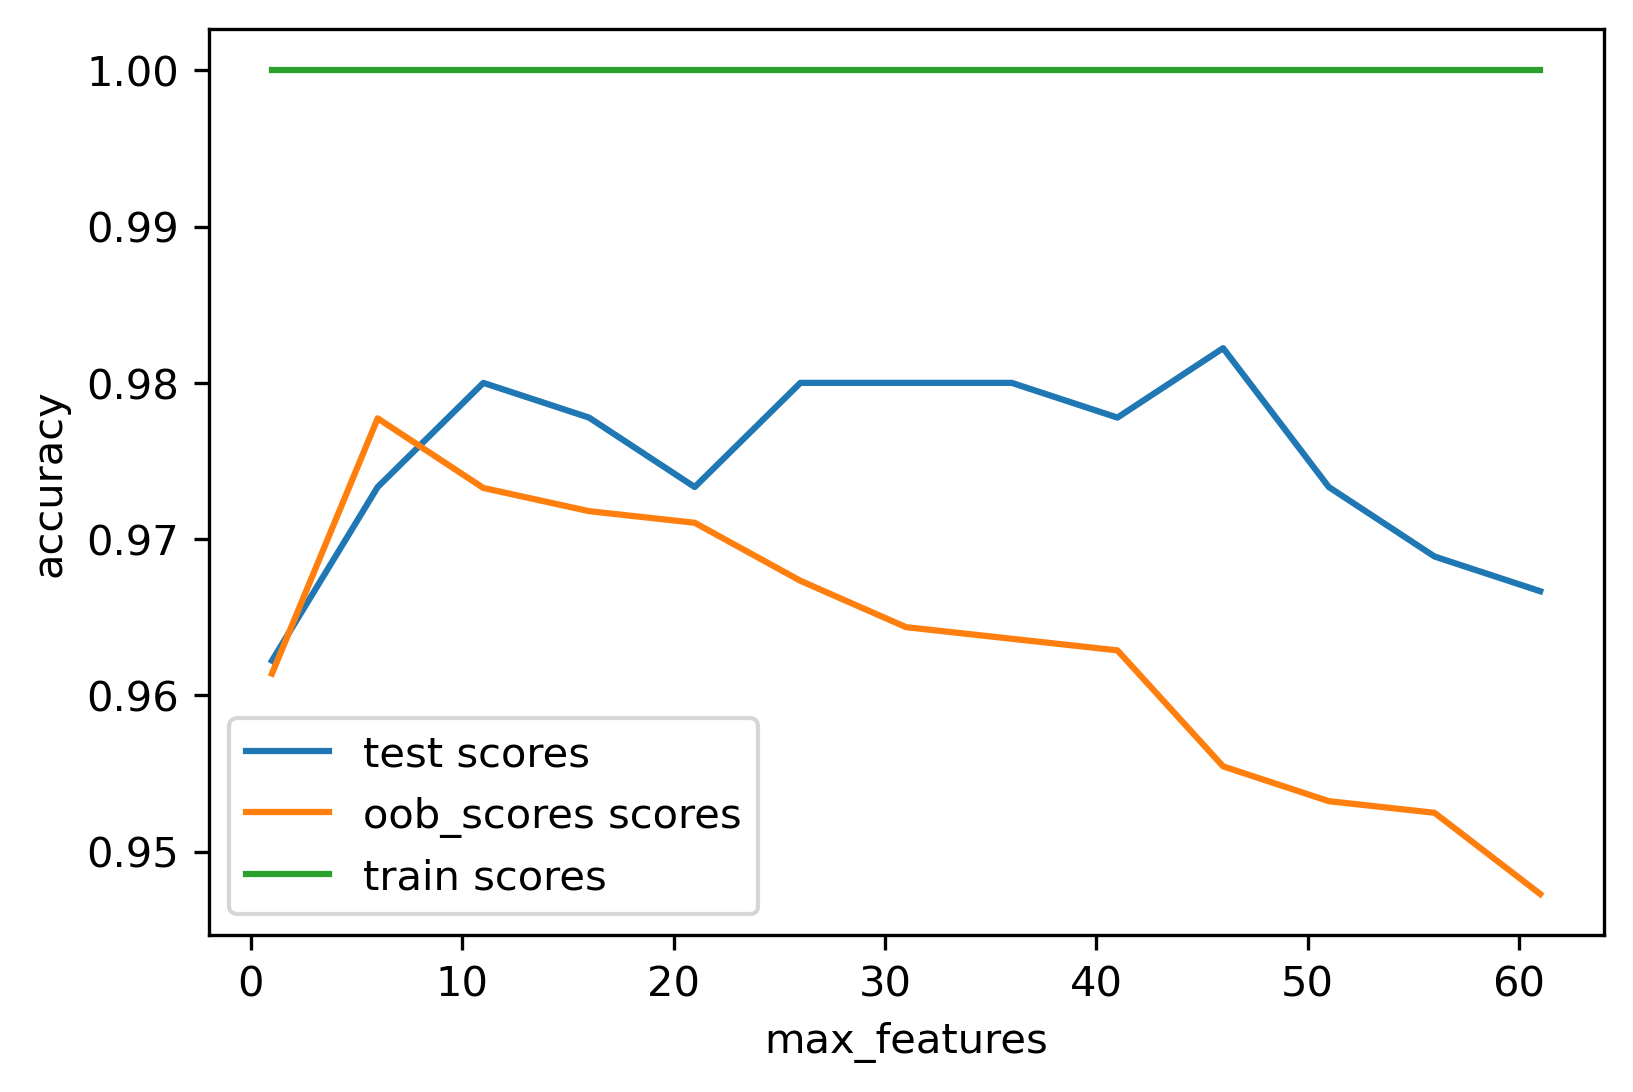

In [12]:
plt.plot(feature_range, test_scores, label='test scores')
plt.plot(feature_range, oob_scores, label='oob_scores scores')
plt.plot(feature_range, train_scores, label='train scores')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('max_features')
plt.show()